In [138]:
from gliomi import Subject

In [139]:
s = Subject("/data/RMN/LUCA_PASQUINI/DATI_SEGMENTATI_SCALATI_media/", "ALESSANDRINI_GLAUCO")

In [140]:
t1 = s.get_sequence("T1")

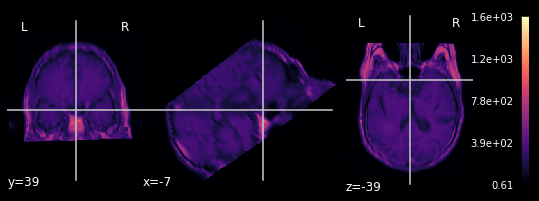

In [141]:
plot_anat(t1, cmap='magma', colorbar=True, display_mode='ortho', annotate=True)


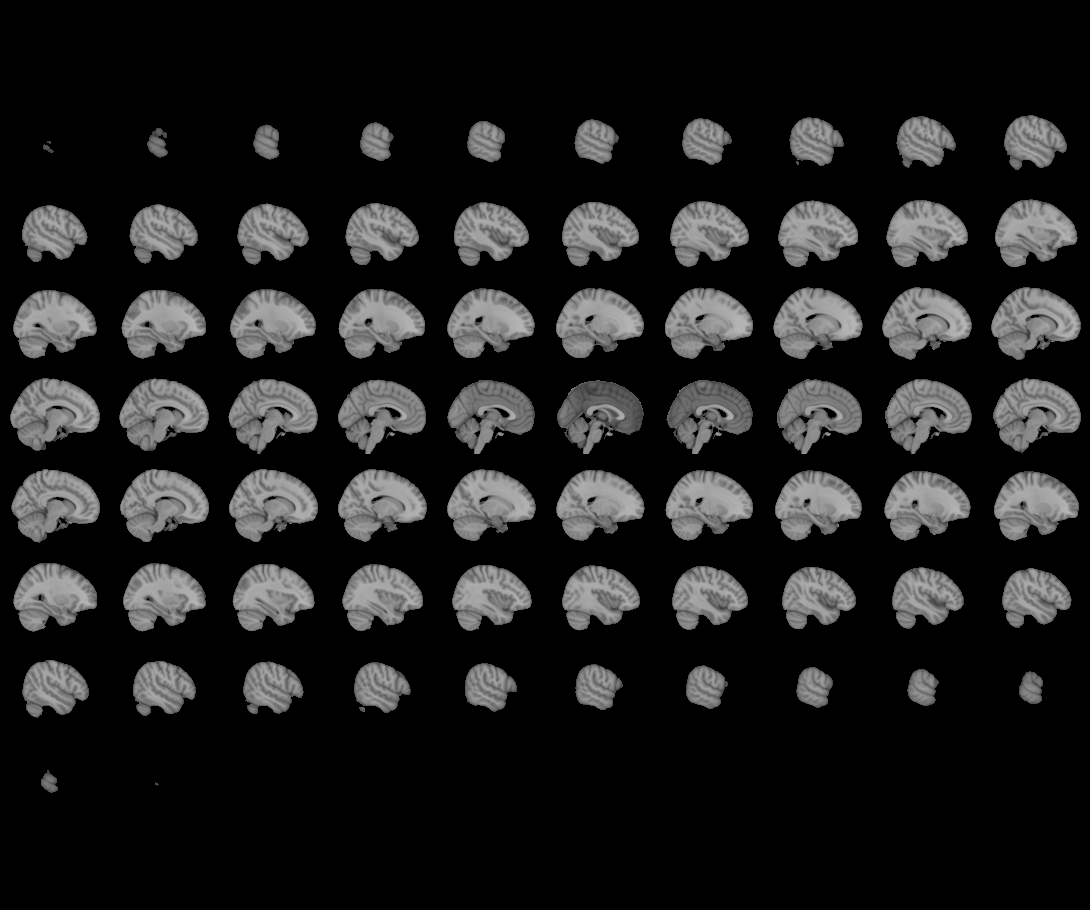
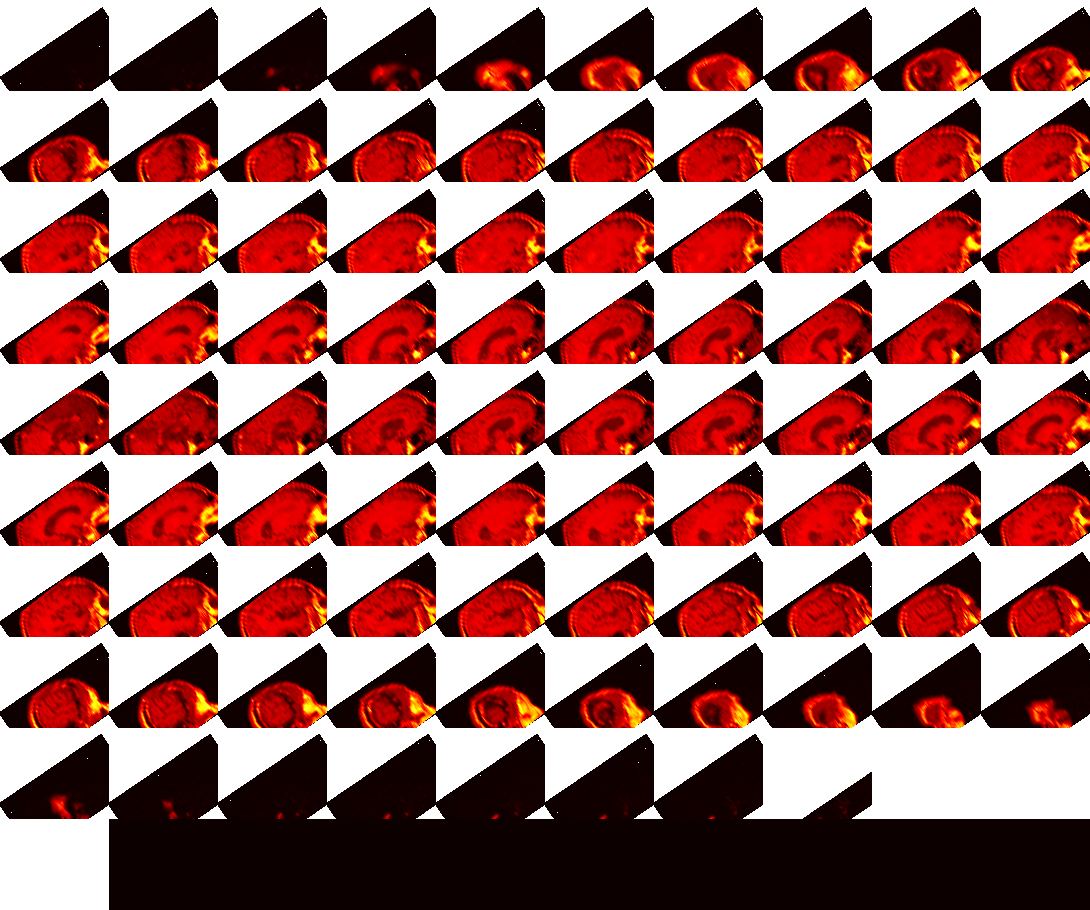

In [135]:
view = plotting.view_img(t1, threshold=3)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

# Extract tumor

In [114]:
bbox = s.bounding_box("T2ROI")

In [136]:
t1.shape, bbox

((192, 256, 128), ((108, 166), (50, 155), (45, 108)))

In [143]:
tumor_slice = t1.get_fdata()[bbox[0][0]:bbox[0][1], bbox[1][0]:bbox[1][1], bbox[2][0]:bbox[2][1]]

In [144]:
tumor = nibabel.Nifti1Image(tumor_slice, affine=t1.affine)

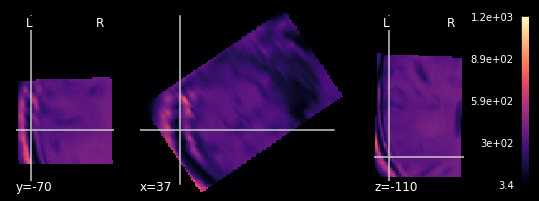

In [145]:
plot_anat(tumor, cmap='magma', colorbar=True, display_mode='ortho', annotate=True)

In [148]:
tumor.shape

(58, 105, 63)

# Resample tumor size to a given cube

In [156]:
import numpy as np

target_affine = np.diag((32, 32, 32))

In [157]:
tumor.affine

array([[-9.76262808e-01, -1.33213371e-05, -2.47701239e-02,
         8.53741379e+01],
       [ 1.35874478e-02,  8.07663560e-01, -5.61929822e-01,
        -5.91547089e+01],
       [-2.00144798e-02,  5.48957109e-01,  8.26749325e-01,
        -1.46797394e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [155]:
tumor_resampled = nl.image.resample_img(tumor, 
                                        target_shape=(32, 32, 32), 
                                        target_affine=target_affine,
                                        interpolation='nearest')

BoundingBoxError: The field of view given by the target affine does not contain any of the data

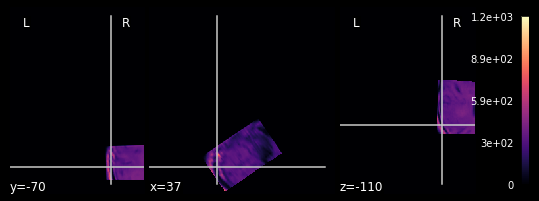

In [150]:
plot_anat(tumor_resampled, cmap='magma', colorbar=True, display_mode='ortho', annotate=True)

In [160]:
!pip3 install --user SimpleITK

     |████████████████████████████████| 42.5MB 3.7MB/s eta 0:00:01     |███████████▏                    | 14.8MB 7.0MB/s eta 0:00:04     |███████████████████████████▏    | 36.0MB 6.1MB/s eta 0:00:02
You should consider upgrading via the 'pip install --upgrade pip' command.


In [165]:
import SimpleITK as sitk

In [168]:
rawimg3d = sitk.Image(50,60,70,sitk.sitkFloat32)
 
print(rawimg3d.GetDimension())

extractor3d = sitk.ExtractImageFilter()

extractor3d.SetSize((20,30,40))

extractor3d.SetIndex((5,6,7))

extractor3d.SetDirectionCollapseToStrategy(extractor3d.DIRECTIONCOLLAPSETOIDENTITY)

print("strategy, ",extractor3d.GetDirectionCollapseToStrategy())

newimg3d = extractor3d.Execute(rawimg3d)

print("Finished 3d extractor")

3
strategy,  1


RuntimeError: Exception thrown in SimpleITK ExtractImageFilter_Execute: /tmp/SimpleITK-build/ITK-prefix/include/ITK-4.13/itkExtractImageFilter.hxx:99:
itk::ERROR: ExtractImageFilter(0x7bb77f0): Extraction Region not consistent with output image

In [164]:
resampler = sitk.ResampleImageFilter()
resampler.SetReferenceImage(t1)
resampled = resampler.Execute(tumor)

data = sitk.GetArrayFromImage(resampled)

TypeError: in method 'ResampleImageFilter_SetReferenceImage', argument 2 of type 'itk::simple::Image const &'

In [134]:
view = plotting.view_img(tumor_resampled, threshold=3)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

/.local/lib/python3.6/site-packages/nilearn/plotting/html_stat_map.py:83: UserWarning: Threshold given was 3, but the data has no values below 155.370849609375. 
  data.min()))


BoundingBoxError: The field of view given by the target affine does not contain any of the data

In [123]:
from nibabel.processing import conform

tumore_resampled = conform(t1, out_shape=(128, 128, 128), affine=t1.affine)

TypeError: conform() got an unexpected keyword argument 'affine'

In [76]:
import numpy as np
np.array(t1.shape) / 2 + np.array([10, 10, 10])

array([106., 138.,  74.])

In [77]:
lice = [106, 138, 74]

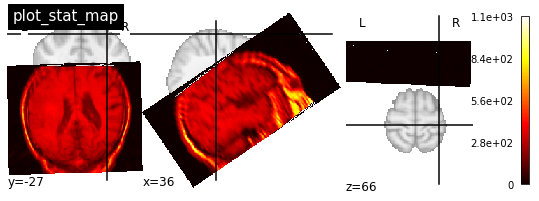

In [78]:
from nilearn import plotting

# Visualizing t-map image on EPI template with manual
# positioning of coordinates using cut_coords given as a list
plotting.plot_stat_map(t1,
                       threshold=3, title="plot_stat_map",
                       cut_coords=[36, -27, 66])


In [102]:
from nibabel.processing import conform

x = conform(t1, out_shape=(128, 128, 128))

# nibabel.conform(from_img, out_shape=(256, 256, 256), voxel_size=(1.0, 1.0, 1.0), order=3, cval=0.0, orientation='RAS', out_class=None)

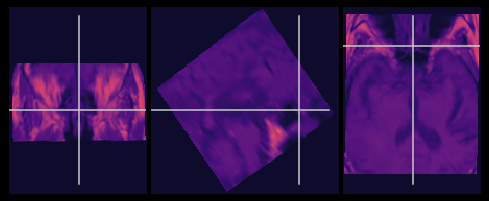

In [103]:
plot_anat(x, cmap='magma', colorbar=False, display_mode='ortho', annotate=False)


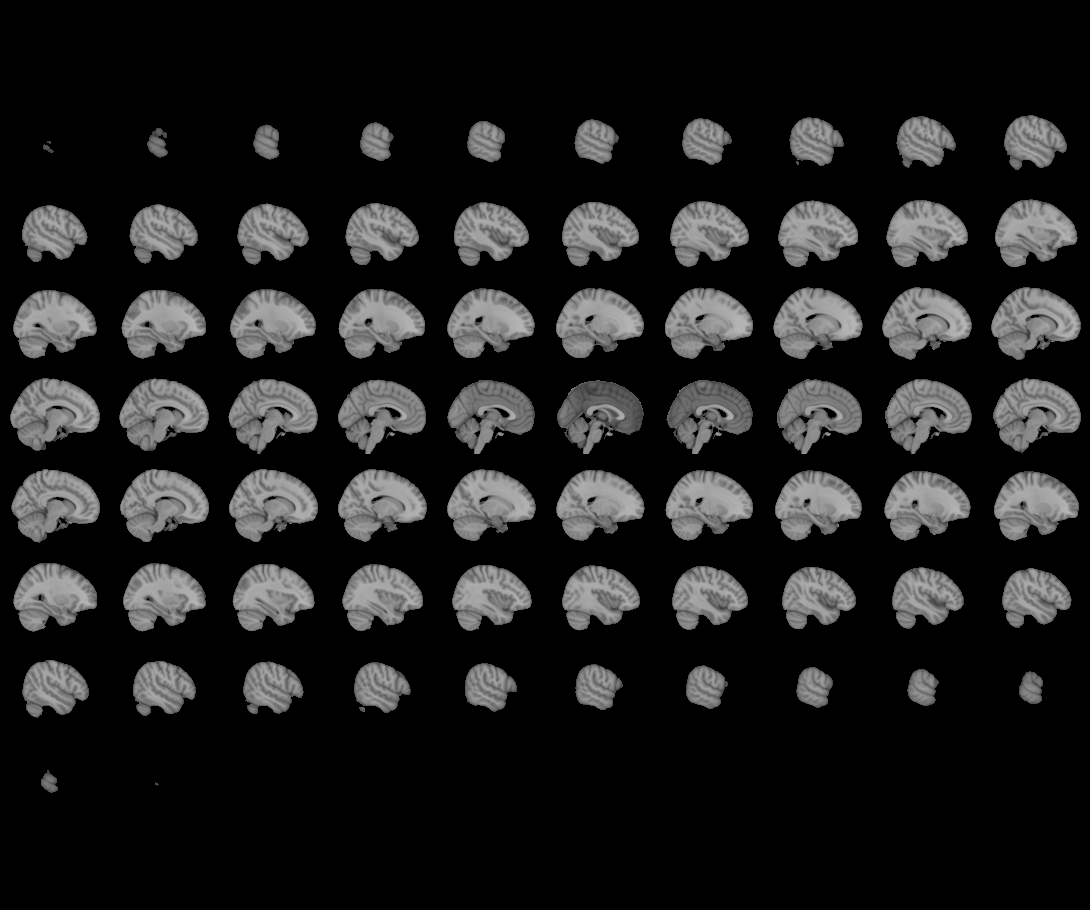
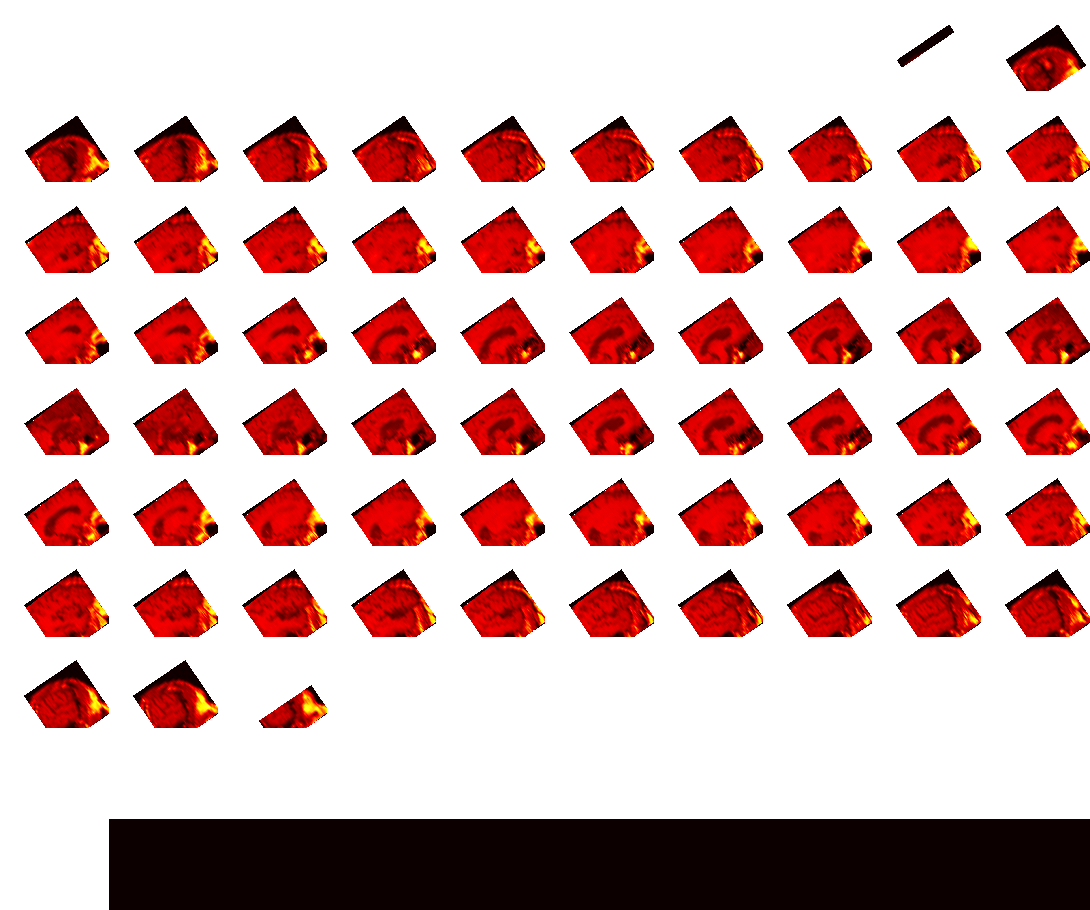

In [105]:
view = plotting.view_img(x, threshold=3)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view


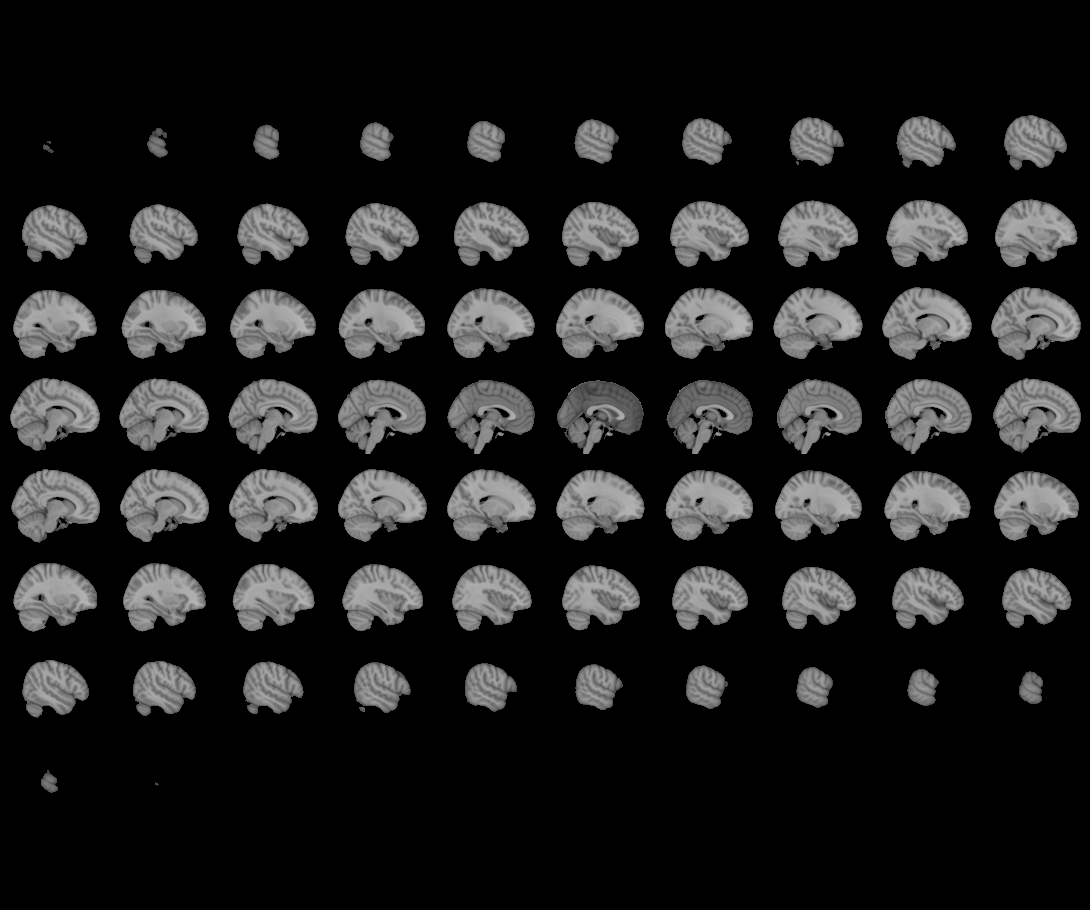
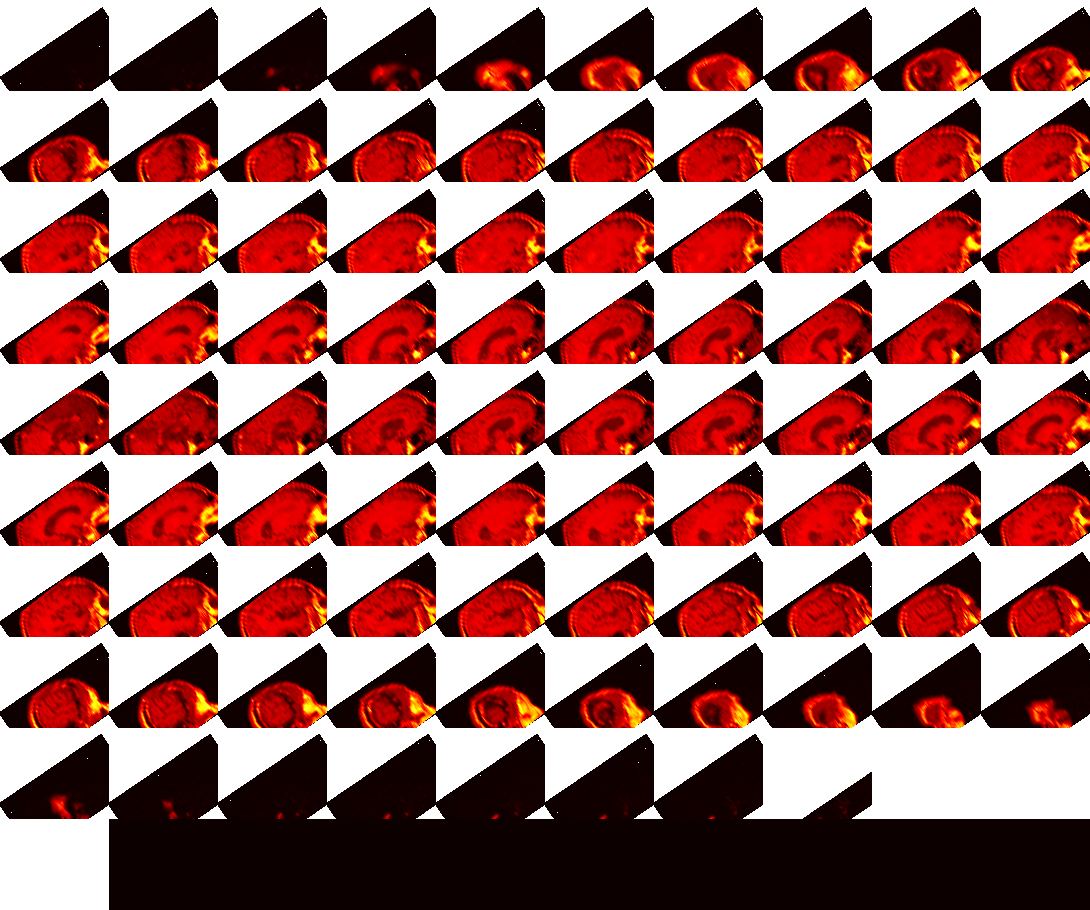

In [106]:
view = plotting.view_img(t1, threshold=3)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

In [79]:
t1_fragment = nibabel.Nifti1Image(t1.dataobj[lice[0]:lice[0]+90,lice[1]:lice[1]+125,lice[2]:lice[2]+90], affine=t1.affine)

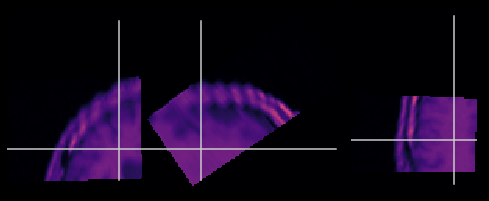

In [80]:
plot_anat(t1_fragment, cmap='magma', colorbar=False, display_mode='ortho', annotate=False)

In [86]:
t1_subsumple = nl.image.resample_img(t1_fragment, target_shape=(32, 32, 32), target_affine=t1_fragment.affine)

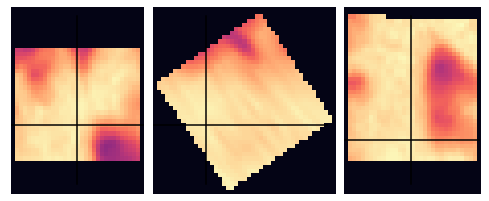

In [87]:
plot_anat(t1_subsumple, cmap='magma', colorbar=False, display_mode='ortho', annotate=False)

In [88]:
view = plotting.view_img(t1_subsumple, threshold=3)
# In a Jupyter notebook, if ``view`` is the output of a cell, it will
# be displayed below the cell
view

/.local/lib/python3.6/site-packages/nilearn/plotting/html_stat_map.py:83: UserWarning: Threshold given was 3, but the data has no values below 138.0867919921875. 
  data.min()))


BoundingBoxError: The field of view given by the target affine does not contain any of the data

In [11]:
t1.affine

array([[-9.76262808e-01, -1.33213371e-05, -2.47701239e-02,
         8.53741379e+01],
       [ 1.35874478e-02,  8.07663560e-01, -5.61929822e-01,
        -5.91547089e+01],
       [-2.00144798e-02,  5.48957109e-01,  8.26749325e-01,
        -1.46797394e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [12]:
s1 = Subject("/data/RMN/LUCA_PASQUINI/DATI_SEGMENTATI_SCALATI_media/", "ANGELONI_GIUSEPPINA")

In [21]:
t11 = s1.get_sequence("T1")

In [22]:
t11.affine

array([[-8.57719064e-01, -4.89088379e-05, -1.24103360e-01,
         9.51467590e+01],
       [ 1.02751954e-02,  8.43116999e-01, -3.86467695e-01,
        -9.35455475e+01],
       [-5.23238853e-02,  1.66370332e-01,  1.95847070e+00,
        -6.93582993e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [17]:
import nilearn as nl

In [19]:
t2 = nl.image.resample_to_img(t11, t1)

In [20]:
t2.affine

array([[-9.76262808e-01, -1.33213371e-05, -2.47701239e-02,
         8.53741379e+01],
       [ 1.35874478e-02,  8.07663560e-01, -5.61929822e-01,
        -5.91547089e+01],
       [-2.00144798e-02,  5.48957109e-01,  8.26749325e-01,
        -1.46797394e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [38]:
img = t1.dataobj[0:10,0:10,0:10]

In [39]:
import nibabel

In [42]:
img.shape

(10, 10, 10)

In [46]:
t2 = nl.image.resample_img(nibabel.Nifti1Image(img, affine=t1.affine), target_shape=(32, 32, 32), target_affine=t1.affine)

In [48]:
t2.shape

(32, 32, 32)

In [50]:
from nilearn.plotting import plot_anat #added

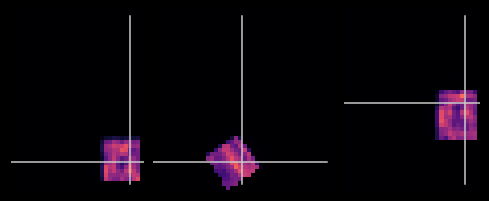

In [52]:
plot_anat(t2, cmap='magma', colorbar=False, display_mode='ortho', annotate=False)

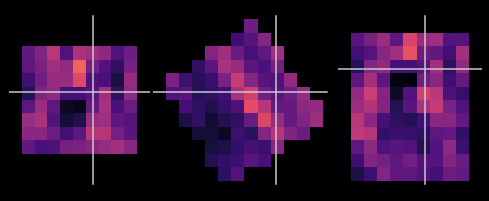

In [56]:
plot_anat(nibabel.Nifti1Image(img, affine=t1.affine), cmap='magma', colorbar=False, display_mode='ortho', annotate=False)

In [8]:
mask = s.get_roi("T2ROI")

In [9]:
s.bounding_box("T2ROI")

((108, 166), (50, 155), (45, 108))